# Supervised UMAP to differentiate DN vs controls
The pipeline allows user to pre-select certain known peptides as starter. Here we examplify it using the DN biomarkers from literature.
### Input files
* `dn_control_test_train.csv` peptidomic data of 800 DN (diabetic nephropathy) patients and healthy controls
* `Supplementary table 1.xls` contains the DN biomarkers that we want to select
### pipeline
* `umap_pipeline.py` for supervised UMAP
* `helper.py` for scatter plot of embedded data
### Steps
1. Peptide intensities (X) and diagnosis (Y) are fitted to the pipeline 
2. Select only the DN biomarkers from X, by supplying a list of peptide names
3. The data were splitted into train ($70\%$) and test ($50\%$)
4. A SVM was trained to select the best UMAP parameters for maximum separation. The default cross validation is 5.
5. The Trained pipeline was applied to test data
6. The embedded test data were plotted in 2-dimension
### Conclusion
The accuracy and separation is improved compared to unsupervised UMAP

In [5]:
import pandas as pd
import numpy as np 

from importlib import reload

from set_path import *
import umap_pipeline
reload(umap_pipeline)


<module 'umap_pipeline' from '/home/the/PycharmProjects/JSiwy/clustering/python/umap_pipeline.py'>

In [2]:
df1=pd.read_csv(f2+'dn_control_test_train.csv',index_col=0)
X=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [6]:
# select biomarkers and put them in a list
dfbiomarker=pd.read_excel(f1+'Supplementary table 1.xls')
biomarker_dn=dfbiomarker.loc[~dfbiomarker['DN&N\np-value (adjusted)'].isnull(),'Peptide ID'].tolist()
biomarker_dn=['x'+str(99900000+i) for i in biomarker_dn]
biomarker_dn

['x99903589',
 'x99904988',
 'x99910428',
 'x99911723',
 'x99913296',
 'x99905548',
 'x99906715',
 'x99907656',
 'x99909323',
 'x99907817',
 'x99903546',
 'x99905205',
 'x99913955',
 'x99914596',
 'x99909580',
 'x99905622',
 'x99908820',
 'x99910114',
 'x99900214',
 'x99900467',
 'x99901100',
 'x99901155',
 'x99901166',
 'x99901399',
 'x99902189',
 'x99902286',
 'x99902472',
 'x99902530',
 'x99902667',
 'x99903180',
 'x99903322',
 'x99903890',
 'x99904177',
 'x99904330',
 'x99904419',
 'x99904666',
 'x99904682',
 'x99904843',
 'x99904945',
 'x99905114',
 'x99905236',
 'x99905423',
 'x99905810',
 'x99906024',
 'x99906186',
 'x99906543',
 'x99906547',
 'x99906709',
 'x99906859',
 'x99906978',
 'x99906985',
 'x99907132',
 'x99907225',
 'x99907226',
 'x99907388',
 'x99907678',
 'x99907807',
 'x99908489',
 'x99908629',
 'x99909124',
 'x99909125',
 'x99909542',
 'x99910025',
 'x99910032',
 'x99910141',
 'x99910266',
 'x99910395',
 'x99910668',
 'x99910771',
 'x99910953',
 'x99911013',
 'x999

In [7]:
pline=umap_pipeline.pline()
pline.load_data(X,y)
pline.selectX_name(biomarker_dn)
pline.logX()
pline.train_test_split(train_size=0.7)
pline.pipeline_fit()

650365
  (112, 4)	0.28471047
  (112, 9)	0.27289978
  (112, 13)	0.27332819
  (112, 61)	0.28444076
  (112, 67)	0.27740586
  (112, 68)	0.28147912
  (112, 83)	0.27181113
  (112, 98)	0.27012238
  (112, 131)	0.3143661
  (112, 193)	0.28669327
  (112, 287)	0.27462488
  (112, 339)	0.28241023
  (112, 383)	0.2711731
  (112, 390)	0.2713123
  (112, 409)	0.30447695
inside function
   (0, 7)	0.25448325
  (0, 91)	0.27337912
  (0, 94)	0.2715631
  (0, 100)	0.29117817
  (0, 102)	0.26844737
  (0, 110)	0.26160297
  (0, 184)	0.32660204
  (0, 199)	0.26175958
  (0, 235)	0.28583932
  (0, 249)	0.30253688
  (0, 264)	0.32843927
  (0, 363)	0.2579061
  (0, 365)	0.28080815
  (0, 379)	0.30842397
  (0, 413)	0.26235154
  (1, 13)	0.29112217
  (1, 46)	0.28234923
  (1, 68)	0.27816594
  (1, 74)	0.29115868
  (1, 95)	0.2917618
  (1, 131)	0.28083304
  (1, 132)	0.27070606
  (1, 160)	0.27522883
  (1, 221)	0.28307676
  (1, 242)	0.27109233
  :	:
  (111, 138)	0.27608368
  (111, 147)	0.30080718
  (111, 150)	0.26898304
  (111, 157)	

In [8]:
pline.get_accuracy()

Accuracy on the train set with UMAP transformation: 0.984
inside function
   (0, 166)	0.6095126
  (0, 197)	0.57180053
  (0, 239)	0.5857438
  (0, 337)	0.5714714
  (0, 463)	0.5929166
  (1, 13)	0.5745853
  (1, 193)	0.59228164
  (1, 350)	0.5803026
  (1, 386)	0.5896731
  (1, 430)	0.5773659
  (2, 2)	0.5658347
  (2, 77)	0.59245104
  (2, 320)	0.6050868
  (2, 470)	0.5960791
  (2, 538)	0.56757313
  (3, 22)	0.5791415
  (3, 114)	0.5765405
  (3, 447)	0.5958261
  (3, 458)	0.5857983
  (3, 493)	0.58044463
  (4, 23)	0.60416913
  (4, 67)	0.5773218
  (4, 200)	0.5778234
  (4, 427)	0.59614897
  (4, 434)	0.5706256
  :	:
  (237, 69)	0.5794252
  (237, 121)	0.5891575
  (237, 180)	0.58345187
  (237, 314)	0.58016545
  (237, 341)	0.57888275
  (238, 55)	0.60958385
  (238, 94)	0.57678795
  (238, 410)	0.5897401
  (238, 473)	0.57888824
  (238, 552)	0.5765218
  (239, 75)	0.5837537
  (239, 166)	0.5786446
  (239, 441)	0.57703555
  (239, 463)	0.5921632
  (239, 551)	0.58249825
  (240, 65)	0.59480983
  (240, 75)	0.5885954


inside function
   (0, 166)	0.6095126
  (0, 197)	0.57180053
  (0, 239)	0.5857438
  (0, 337)	0.5714714
  (0, 463)	0.5929166
  (1, 13)	0.5745853
  (1, 193)	0.59228164
  (1, 350)	0.5803026
  (1, 386)	0.5896731
  (1, 430)	0.5773659
  (2, 2)	0.5658347
  (2, 77)	0.59245104
  (2, 320)	0.6050868
  (2, 470)	0.5960791
  (2, 538)	0.56757313
  (3, 22)	0.5791415
  (3, 114)	0.5765405
  (3, 447)	0.5958261
  (3, 458)	0.5857983
  (3, 493)	0.58044463
  (4, 23)	0.60416913
  (4, 67)	0.5773218
  (4, 200)	0.5778234
  (4, 427)	0.59614897
  (4, 434)	0.5706256
  :	:
  (237, 69)	0.5794252
  (237, 121)	0.5891575
  (237, 180)	0.58345187
  (237, 314)	0.58016545
  (237, 341)	0.57888275
  (238, 55)	0.60958385
  (238, 94)	0.57678795
  (238, 410)	0.5897401
  (238, 473)	0.57888824
  (238, 552)	0.5765218
  (239, 75)	0.5837537
  (239, 166)	0.5786446
  (239, 441)	0.57703555
  (239, 463)	0.5921632
  (239, 551)	0.58249825
  (240, 65)	0.59480983
  (240, 75)	0.5885954
  (240, 314)	0.5784703
  (240, 513)	0.5805933
  (240, 542)

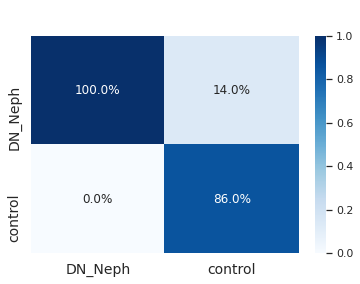

In [10]:
pline.get_confusion_matrix(on='test')

inside function
   (0, 166)	0.6095126
  (0, 197)	0.57180053
  (0, 239)	0.5857438
  (0, 337)	0.5714714
  (0, 463)	0.5929166
  (1, 13)	0.5745853
  (1, 193)	0.59228164
  (1, 350)	0.5803026
  (1, 386)	0.5896731
  (1, 430)	0.5773659
  (2, 2)	0.5658347
  (2, 77)	0.59245104
  (2, 320)	0.6050868
  (2, 470)	0.5960791
  (2, 538)	0.56757313
  (3, 22)	0.5791415
  (3, 114)	0.5765405
  (3, 447)	0.5958261
  (3, 458)	0.5857983
  (3, 493)	0.58044463
  (4, 23)	0.60416913
  (4, 67)	0.5773218
  (4, 200)	0.5778234
  (4, 427)	0.59614897
  (4, 434)	0.5706256
  :	:
  (237, 69)	0.5794252
  (237, 121)	0.5891575
  (237, 180)	0.58345187
  (237, 314)	0.58016545
  (237, 341)	0.57888275
  (238, 55)	0.60958385
  (238, 94)	0.57678795
  (238, 410)	0.5897401
  (238, 473)	0.57888824
  (238, 552)	0.5765218
  (239, 75)	0.5837537
  (239, 166)	0.5786446
  (239, 441)	0.57703555
  (239, 463)	0.5921632
  (239, 551)	0.58249825
  (240, 65)	0.59480983
  (240, 75)	0.5885954
  (240, 314)	0.5784703
  (240, 513)	0.5805933
  (240, 542)

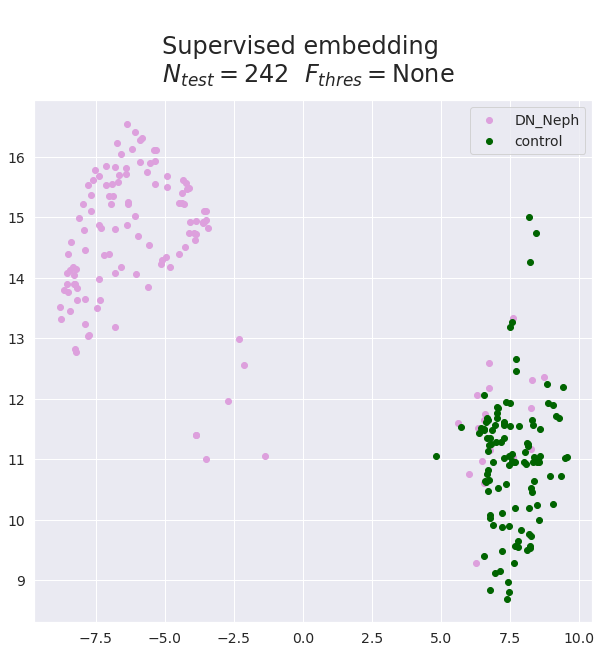

In [9]:
pline.get_plot(on='test',legend='box',figout=f3+'supervised_dn_dnbiomarker.tiff')

inside function
   (0, 166)	0.6095126
  (0, 197)	0.57180053
  (0, 239)	0.5857438
  (0, 337)	0.5714714
  (0, 463)	0.5929166
  (1, 13)	0.5745853
  (1, 193)	0.59228164
  (1, 350)	0.5803026
  (1, 386)	0.5896731
  (1, 430)	0.5773659
  (2, 2)	0.5658347
  (2, 77)	0.59245104
  (2, 320)	0.6050868
  (2, 470)	0.5960791
  (2, 538)	0.56757313
  (3, 22)	0.5791415
  (3, 114)	0.5765405
  (3, 447)	0.5958261
  (3, 458)	0.5857983
  (3, 493)	0.58044463
  (4, 23)	0.60416913
  (4, 67)	0.5773218
  (4, 200)	0.5778234
  (4, 427)	0.59614897
  (4, 434)	0.5706256
  :	:
  (237, 69)	0.5794252
  (237, 121)	0.5891575
  (237, 180)	0.58345187
  (237, 314)	0.58016545
  (237, 341)	0.57888275
  (238, 55)	0.60958385
  (238, 94)	0.57678795
  (238, 410)	0.5897401
  (238, 473)	0.57888824
  (238, 552)	0.5765218
  (239, 75)	0.5837537
  (239, 166)	0.5786446
  (239, 441)	0.57703555
  (239, 463)	0.5921632
  (239, 551)	0.58249825
  (240, 65)	0.59480983
  (240, 75)	0.5885954
  (240, 314)	0.5784703
  (240, 513)	0.5805933
  (240, 542)

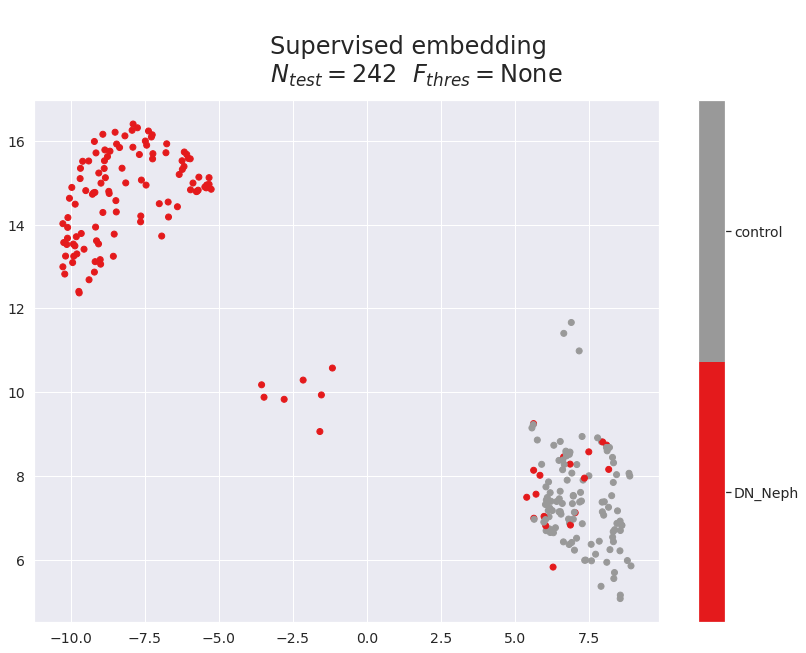

In [8]:
pline.get_plot(on='test',legend='bar',figout='test_dnbiomarker.tiff')